In [ ]:
!git clone https://github.com/RoehrichLukas/ponds_ERSU_jf_20251106
%cd ponds_ERSU_jf_20251106

In [ ]:
pip install -e .

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 26.6 MB/s  0:00:00 eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 26.2 MB/s  0:00:00 eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 28.9 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5/5 [cartopy]m4/5 [cartopy]
Note: you may need to restart the kernel to use updated packages.


# PONDS - a 'feuchtfröhliches' Coding Adventure

In [15]:
# Prerequisites
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams["figure.dpi"] = 300
plt.rcParams["figure.figsize"] = (12, 5)

## Creating a PONDS object is easy!

In [16]:
from ponds.core import PONDS

lat_size = 100
lon_size = 200
time_size = 500

pd = PONDS(
    lat_size=lat_size,
    lon_size=lon_size,
    time_size=time_size,
)

fig1, ax1 = pd.worldmap(
    show_cells=True,
)
fig2, ax2 = pd.plot_all_ts()

AttributeError: module 'numpy' has no attribute '_no_nep50_warning'

## Let's fill it with some life

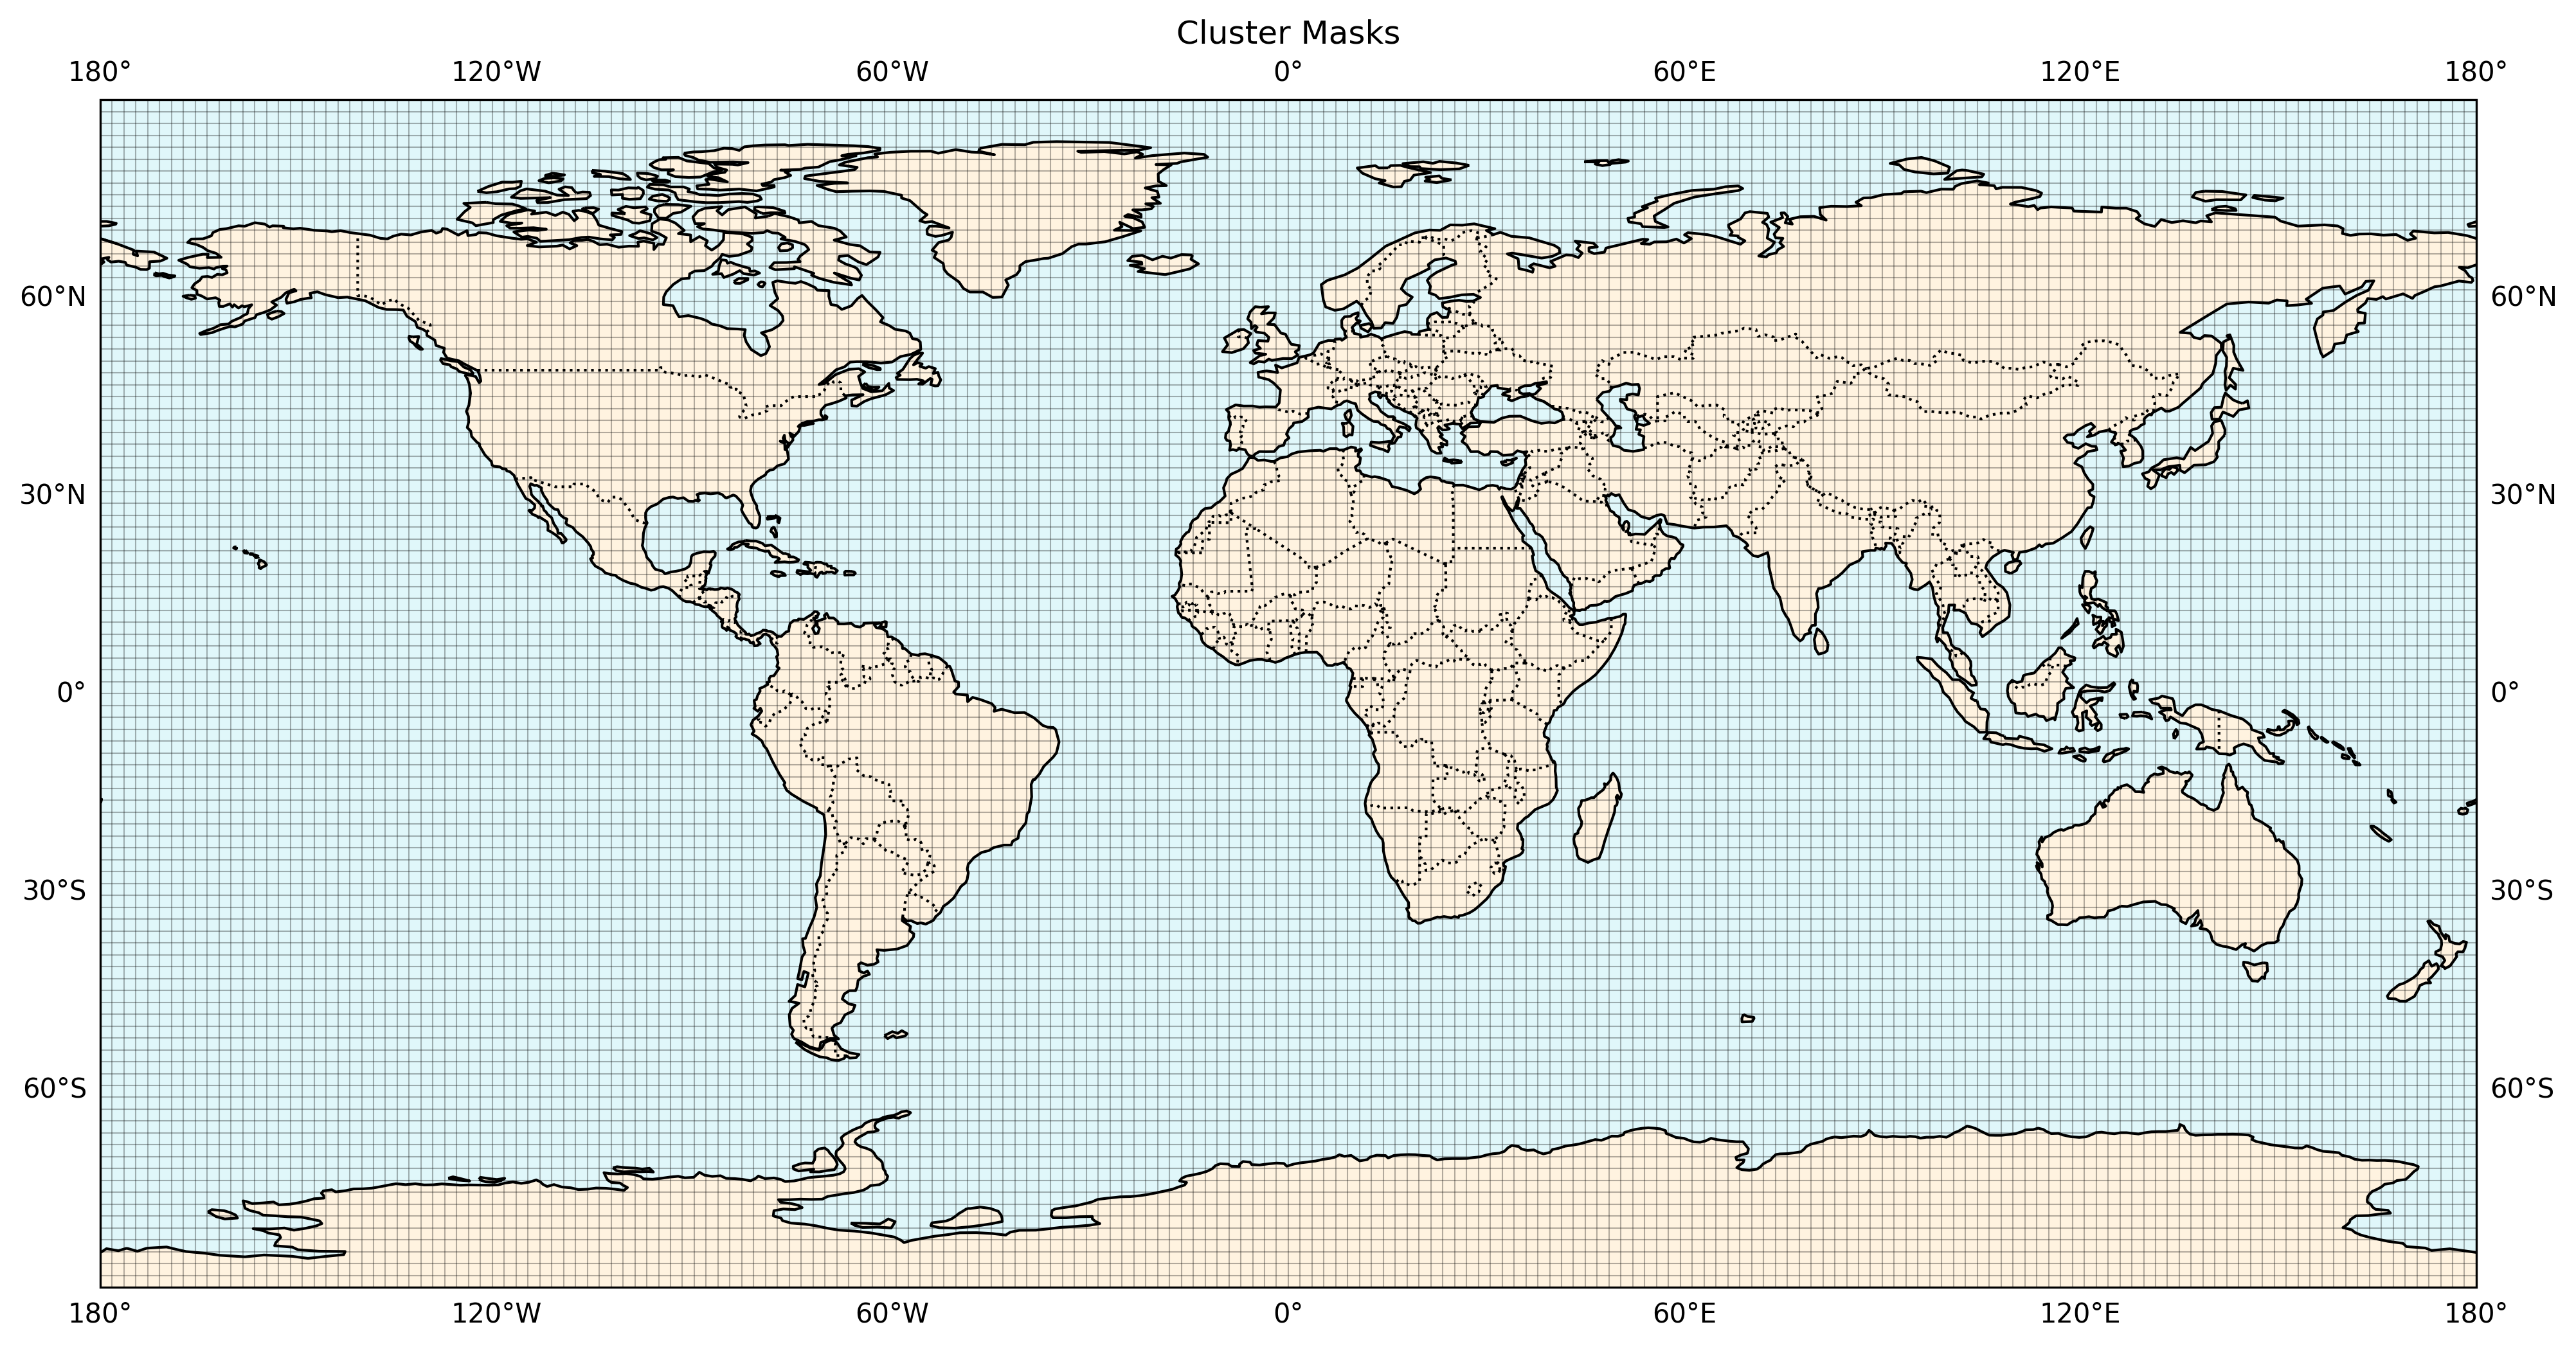

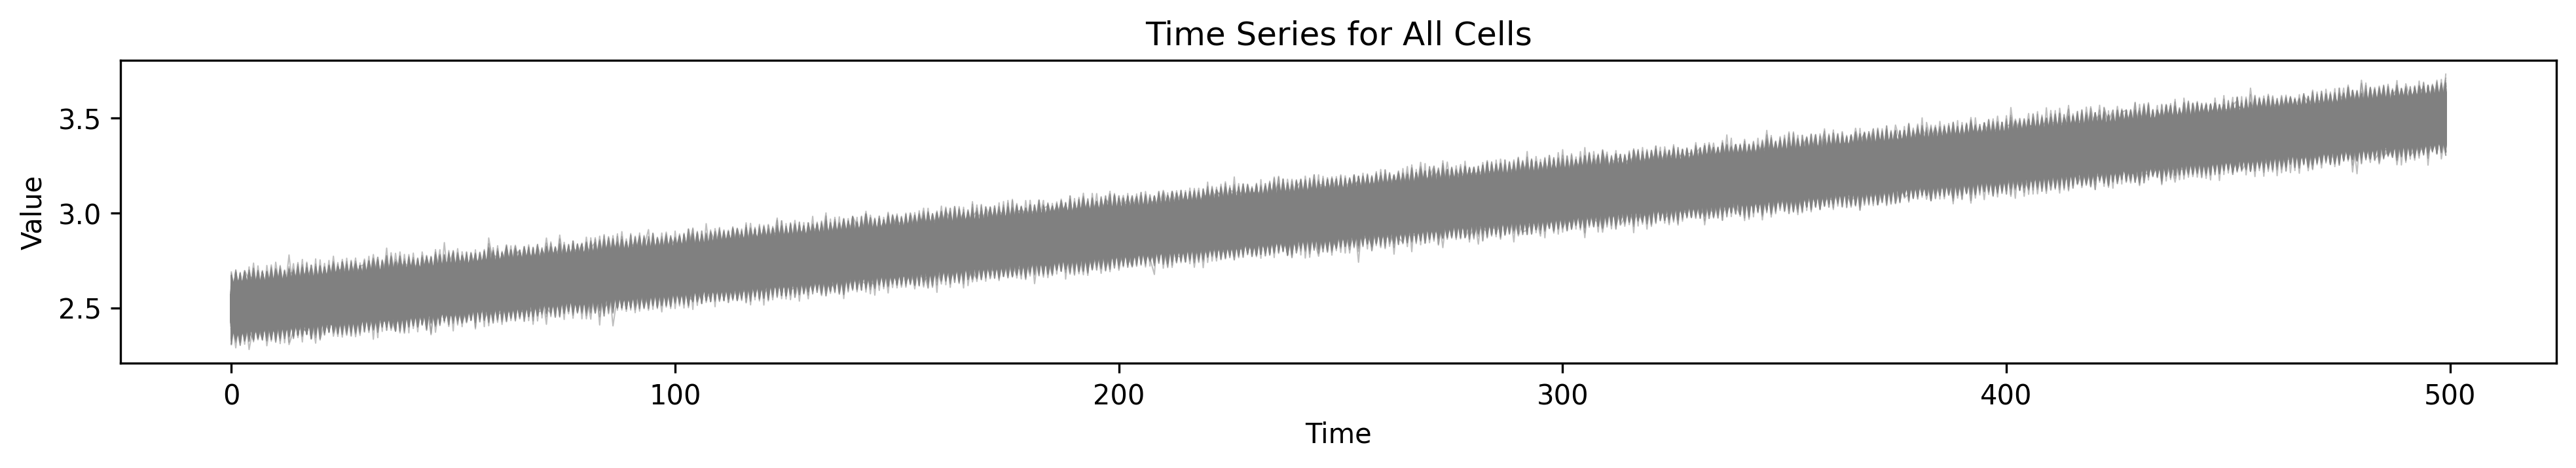

In [7]:
from ponds import WhiteNoise, Trend

background_noise = 0.05
background_trend = 0.002
background_intercept = 2.5
time_size = 200

pd.add_background(
    background_method=WhiteNoise(
        magnitude=background_noise,
        background_seed=1,
    )
)
pd.add_background(
    background_method=Trend(
        slope=background_trend,
        intercept=background_intercept,
    )
)


fig1, ax1 = pd.worldmap(
    show_cells=True,
)
fig2, ax2 = pd.plot_all_ts()